In [10]:
import torch 
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np


In [26]:
BATCH_SIZE = 64
LR = 0.0001
N_IDEAS = 5
ART_COMPONENTS = 15
PAINT_POINTS = np.vstack([np.linspace(-1,1, ART_COMPONENTS) for _ in range(BATCH_SIZE)])

In [27]:
PAINT_POINTS

array([[-1.        , -0.85714286, -0.71428571, -0.57142857, -0.42857143,
        -0.28571429, -0.14285714,  0.        ,  0.14285714,  0.28571429,
         0.42857143,  0.57142857,  0.71428571,  0.85714286,  1.        ],
       [-1.        , -0.85714286, -0.71428571, -0.57142857, -0.42857143,
        -0.28571429, -0.14285714,  0.        ,  0.14285714,  0.28571429,
         0.42857143,  0.57142857,  0.71428571,  0.85714286,  1.        ],
       [-1.        , -0.85714286, -0.71428571, -0.57142857, -0.42857143,
        -0.28571429, -0.14285714,  0.        ,  0.14285714,  0.28571429,
         0.42857143,  0.57142857,  0.71428571,  0.85714286,  1.        ],
       [-1.        , -0.85714286, -0.71428571, -0.57142857, -0.42857143,
        -0.28571429, -0.14285714,  0.        ,  0.14285714,  0.28571429,
         0.42857143,  0.57142857,  0.71428571,  0.85714286,  1.        ],
       [-1.        , -0.85714286, -0.71428571, -0.57142857, -0.42857143,
        -0.28571429, -0.14285714,  0.        , 

In [28]:
PAINT_POINTS[0].shape

(15,)

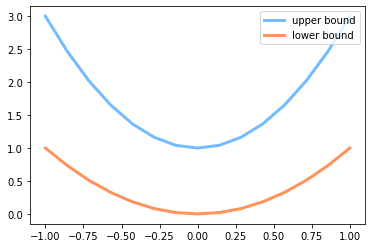

In [29]:
plt.plot(PAINT_POINTS[0], 2 * np.power(PAINT_POINTS[0], 2) + 1, c='#74BCFF', lw=3, label='upper bound')
plt.plot(PAINT_POINTS[0], 1 * np.power(PAINT_POINTS[0], 2) + 0, c='#FF9359', lw=3, label='lower bound')
plt.legend(loc='upper right')
plt.show()

In [36]:
def artist_work():
    a = np.random.uniform(1, 2, size=BATCH_SIZE)[:, np.newaxis]
    paintings = a * np.power(PAINT_POINTS, 2) + a-1
    paintings = torch.from_numpy(paintings).float()
    return paintings

In [37]:
artist_work().shape

torch.Size([64, 15])

In [38]:
G = nn.Sequential(
    nn.Linear(N_IDEAS, 128),
    nn.ReLU(),
    nn.Linear(128, ART_COMPONENTS),
)

D = nn.Sequential(
    nn.Linear(ART_COMPONENTS, 128),
    nn.ReLU(),
    nn.Linear(128, 1),
    nn.Sigmoid(),
)

In [39]:
optim_d = torch.optim.Adam(D.parameters(), lr=LR)
optim_g = torch.optim.Adam(G.parameters(), lr=LR)

In [40]:
plt.ion()